In [1]:
%matplotlib inline

In [2]:
# my imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [3]:
reviews = pd.read_csv('data/customer_reviews_for_training.csv')

In [4]:
reviews.head()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


In [5]:
reviews['Sno'] = reviews['Sno'].astype('category')

In [6]:
reviews.dtypes

Sno                   category
book name               object
review title            object
reviewer                object
reviewer rating          int64
review description      object
is_verified               bool
date                    object
timestamp               object
ASIN                    object
dtype: object

In [7]:
reviews.shape

(920, 10)

In [8]:
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
reviewer rating,920.0,4.826087,0.432839,2.0,5.0,5.0,5.0,5.0


<Axes: >

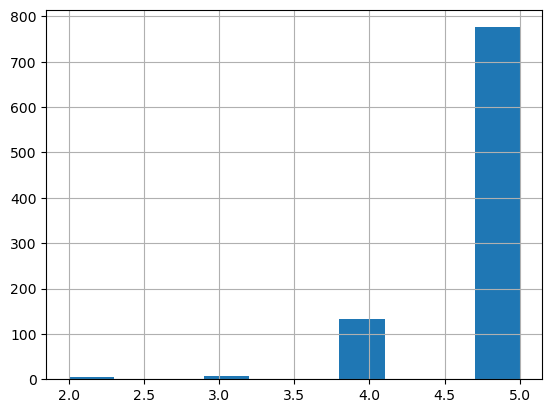

In [9]:
reviews['reviewer rating'].hist()

Positive >=4 <br>
Negative <4

In [10]:
reviews.columns

Index(['Sno', 'book name', 'review title', 'reviewer', 'reviewer rating',
       'review description', 'is_verified', 'date', 'timestamp', 'ASIN'],
      dtype='object')

In [11]:
len(reviews['book name'].unique())

91

In [12]:
reviews.dtypes

Sno                   category
book name               object
review title            object
reviewer                object
reviewer rating          int64
review description      object
is_verified               bool
date                    object
timestamp               object
ASIN                    object
dtype: object

In [13]:
reviews[reviews['reviewer rating'] >= 4]

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
...,...,...,...,...,...,...,...,...,...,...
915,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,02-11-2023,"Reviewed in the United States November 2, 2023",545261244
916,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,30-10-2023,"Reviewed in the United States October 30, 2023",545261244
917,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,24-10-2023,"Reviewed in the United States October 24, 2023",545261244
918,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,19-10-2023,"Reviewed in the United States October 19, 2023",545261244


In [14]:
reviews[reviews['reviewer rating'] < 4]

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
14,14,"Friends, Lovers, and the Big Terrible Thing: A...",The One with the Double Review,mandylouplus3,3,"So, I will review this as two people: A writer...",True,14-11-2022,"Reviewed in the United States November 14, 2022",1250866448
61,61,All the Light We Cannot See: A Novel,It’s as if he sacrificed characters for beauti...,Denise Baer,2,Anthony Doerr’s descriptions are like no other...,True,20-01-2016,"Reviewed in the United States January 20, 2016",1501173219
196,196,A Court of Thorns and Roses (A Court of Thorns...,ACOTAR is nothing more than erotica,Anne Pruitt,2,"So here I sit, having gone through the OMG ACO...",True,13-11-2018,"Reviewed in the United States November 13, 2018",1635575567
197,197,A Court of Thorns and Roses (A Court of Thorns...,ஐBeauty and the Beast meets Faerie ஐ,Robin Snyder,3,ஐBeauty and the Beast meets Faerie ஐ – I shoul...,True,08-05-2015,"Reviewed in the United States May 8, 2015",1635575567
308,308,How to Catch a Reindeer,"Great concept, weird delivery",Taylor Chapman,3,How to catch a mermaid was adorable - this boo...,True,14-02-2023,"Reviewed in the United States February 14, 2023",1728276136
367,367,Hundred Years' War on Palestine,"A good, comprehensive summary",A H Kobayashi,3,This short book is rather ambitious in the sen...,True,27-05-2021,"Reviewed in the United States May 27, 2021",1250787653
368,368,Hundred Years' War on Palestine,Was afraid of this…,Michelle,2,I am someone who knew virtually nothing about ...,True,10-10-2023,"Reviewed in the United States October 10, 2023",1250787653
397,397,I Am Thankful: A Thanksgiving Book for Kids,Not recommended for younger kids.,Cheyrle,3,The story line of this book is very confusing ...,True,16-11-2022,"Reviewed in the United States November 16, 2022",1646115538
524,524,There Was an Old Lady Who Swallowed a Turkey!,This wasnt enjoyed by the kids,Frances,3,I bought this book since the kids and I enjoye...,True,26-11-2022,"Reviewed in the United States November 26, 2022",545931908
556,556,Llama Llama Gives Thanks,Returned,Johnie,3,I really like the Llama books we have but this...,True,03-11-2022,"Reviewed in the United States November 3, 2022",110199715X


In [15]:
classifier = lambda x : 'Negative' if x < 4 else 'Positive'

In [16]:
reviews['polar_classification']= reviews['reviewer rating'].apply(classifier)

In [17]:
reviews

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN,polar_classification
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048,Positive
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048,Positive
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,Positive
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048,Positive
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,Positive
...,...,...,...,...,...,...,...,...,...,...,...
915,915,The Wonky Donkey,The best child/grandmother book ever written,Marilyn Kreienkamp,5,This is exactly the kind of book children unde...,True,02-11-2023,"Reviewed in the United States November 2, 2023",545261244,Positive
916,916,The Wonky Donkey,Great book,Amazon Customer,5,We get this book for all our grandchildren the...,True,30-10-2023,"Reviewed in the United States October 30, 2023",545261244,Positive
917,917,The Wonky Donkey,"Fun book, makes you laugh",Jennifer Tinucci,5,I saw a grandma reading this book to her grand...,True,24-10-2023,"Reviewed in the United States October 24, 2023",545261244,Positive
918,918,The Wonky Donkey,Cutest beck ever!!,Janice Easter,5,I have ordered this book over and over to give...,True,19-10-2023,"Reviewed in the United States October 19, 2023",545261244,Positive


In [18]:
reviews.groupby('polar_classification')['reviewer rating'].unique()

polar_classification
Negative    [3, 2]
Positive    [4, 5]
Name: reviewer rating, dtype: object

In [19]:
reviews.head()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN,polar_classification
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048,Positive
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048,Positive
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,Positive
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048,Positive
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048,Positive


Anonymize reviewer 

In [20]:
anonimyzer_func = lambda x: hashlib.sha256(x.encode()).hexdigest()

In [21]:
reviews['reviewer_anonymous'] = reviews['reviewer'].apply(anonimyzer_func)

In [22]:
reviews = reviews.drop('reviewer', axis=1)

In [23]:
reviews.columns = ['#', 'book_name', 'review_title', 'reviewer_rating',
       'review_description', 'is_verified', 'date', 'timestamp', 'ASIN',
       'polar_classification', 'reviewer_anonymous']

Reorder

In [24]:
reviews_tidy = reviews[['#', 'book_name', 'reviewer_anonymous', 'reviewer_rating',
       'review_description', 'date'
        ]][reviews['is_verified']]

In [25]:
reviews_tidy.head()

,#,book_name,reviewer_anonymous,reviewer_rating,review_description,date
0,0,The Woman in Me,6ce3606d5be9785bcd9b10b844b98cf3b337b7a97a7f9c...,4,I'm only a third way in. Shipped lightening fa...,26-10-2023
1,1,The Woman in Me,243aa726ab7df2a7630a3a36c7d3a12f14e9d80cd3ab83...,5,"""There have been so many times when I was scar...",06-11-2023
2,2,The Woman in Me,eaea2ab37288945d63173beddf5680a39c37672c4386d6...,5,The media could not be loaded. I personally ha...,01-11-2023
3,3,The Woman in Me,9e554d1ebb53e03ec42b99ae5842c8a7309af90010bc51...,5,I have been a fan of Britney's music since the...,25-10-2023
4,4,The Woman in Me,4795e19c3660f232dd519252ac99d99fd53e23c7cf9a5e...,5,"Whether or not you’re a fan, it’s a great read...",01-11-2023


In [26]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation)

In [27]:
# Function to preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation
    text = text.translate(punctuation_table)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords and lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Joining tokens back to a single string
    return ' '.join(cleaned_tokens)

In [28]:
reviews_tidy['cleaned_review'] = reviews_tidy['review_description'].apply(preprocess_text)

In [29]:
reviews_tidy.to_csv('data/cleaned_reviews_for_training_various.csv', index = None)